In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import nltk
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
from sklearn.metrics import accuracy_score , precision_score , recall_score , confusion_matrix , ConfusionMatrixDisplay , classification_report
import warnings
warnings.filterwarnings("ignore")
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
df = pd.read_csv(r"C:\Users\User\Downloads\emotions.csv")
df

,text,label
0,ive enjoyed being able to slouch about relax a...,0
1,i dont know i feel so lost,0
2,i was beginning to feel quite disheartened,0
3,i can still lose the weight without feeling de...,0
4,im feeling a little like a damaged tree and th...,0
...,...,...
11995,i feel weird using his first name but the alte...,5
11996,i read them i feel pleasantly surprised that t...,5
11997,i feel a strange sense of guilt about it all,5
11998,i let people know how i m actually feeling and...,5


In [3]:
df['label'].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [4]:
df['label'] = df['label'].map({0:'Sad' , 1:"Joy" , 2:"LOve" , 3:"Anger" , 4:"Fear" , 5:"Surprise"})
df['label']

0             Sad
1             Sad
2             Sad
3             Sad
4             Sad
           ...   
11995    Surprise
11996    Surprise
11997    Surprise
11998    Surprise
11999    Surprise
Name: label, Length: 12000, dtype: object

0 - sad
1 - joy
2 - love
3 - anger
4 - fear
5 - surprise

**EDA**

In [5]:
df.shape

(12000, 2)

In [6]:
df.isna().sum()

text     0
label    0
dtype: int64

In [7]:
df.duplicated().sum()

1

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

<Axes: >

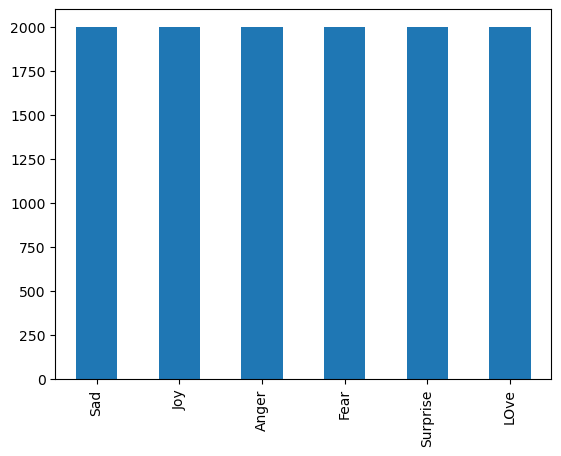

In [10]:
df['label'].value_counts().plot(kind='bar')

In [11]:
X = df['text']
y = df['label']

In [12]:
X_train , X_test , y_train, y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

In [13]:
X_test

1935                           im feeling really exhausted
6495     i do not mind if i do not celebrate but i also...
1720     i can t help feel disappointed that i missed t...
9121     i stop this no thought eating after i am feeli...
360      i feel bad that my very first signing on satur...
                               ...                        
1195               i was beginning to feel a bit depressed
11877    i am unclear as to what exactly that reading m...
5421           i feel is the i want to make affectionate m
3855     i feel like these looked brighter in the bottl...
4414                    i feel sympathetic for the asshole
Name: text, Length: 2400, dtype: object

In [14]:
pipe = Pipeline([('Vectorizer' , CountVectorizer(stop_words='english')),
          ("Estimeter" , MultinomialNB(alpha=3))])

In [15]:
pipe.fit(X_train , y_train)

Pipeline(steps=[('Vectorizer', CountVectorizer(stop_words='english')),
                ('Estimeter', MultinomialNB(alpha=3))])

In [16]:
y_train

9183         Fear
10488    Surprise
6429        Anger
288           Sad
2626          Joy
           ...   
11965    Surprise
5191         LOve
5390         LOve
860           Sad
7271        Anger
Name: label, Length: 9599, dtype: object

In [17]:
pipe.predict(X_test)

array(['Sad', 'Anger', 'Sad', ..., 'LOve', 'Joy', 'LOve'], dtype='<U8')

**Creating pickle file**

In [34]:
import pickle

In [35]:
pickle.dump(pipe , open("Emotion.pkl" , 'wb'))

In [36]:
import os

In [38]:
os.getcwd()

'C:\\Users\\User\\#DataScience-IRL-Hyd\\AI-ML-Inn\\3. ML Model Building\\Naive Bayes Alg'

In [39]:
predict = pickle.load(open("Emotion.pkl" , "rb"))

In [40]:
predict.predict(["I am feeling alone"])

array(['Fear'], dtype='<U8')